In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [3]:
types = {'id': int, 'titulo': str, 'descripcion': str, 'tipodepropiedad': str, 'direccion': str,
        'ciudad': str, 'provincia': str, 'antiguedad': np.float32, 'habitaciones': np.float32,
        'garages':np.float32, 'idzona': np.float32, 'lat': np.float32, 'lng': np.float32,
        'gimnasio': bool, 'usosmultiples': bool, 'piscina': bool, 'escuelascercanas':bool,
        'centroscomercialescercanos':bool, 'precio':int}
data = pd.read_csv('../../data/train.csv', dtype = types)

data.head(2)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,False,False,False,False,False,2273000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310204,-99.227654,2013-06-28 00:00:00,False,False,False,True,True,3600000


In [4]:
data['sum'] = 1
data.metroscubiertos.describe()

count    222600.000000
mean        174.016774
std          98.152950
min          15.000000
25%          90.000000
50%         153.000000
75%         240.000000
max         439.000000
Name: metroscubiertos, dtype: float64

In [5]:
#data.dropna(subset={'metroscubiertos'},inplace=True)
#data.metrostotales.fillna(value=data.metroscubiertos,inplace=True)
data.metrostotales.describe()

count    188533.000000
mean        176.765145
std          94.427328
min          15.000000
25%         102.000000
50%         155.000000
75%         238.000000
max         439.000000
Name: metrostotales, dtype: float64

In [6]:
data.loc[data.metrostotales>350, 'rango_superficie'] = '+350'
data.loc[((data.metrostotales>300) & (data.metrostotales<351)), 'rango_superficie'] = '300-350'
data.loc[((data.metrostotales>250) & (data.metrostotales<301)), 'rango_superficie'] = '250-300'
data.loc[((data.metrostotales>200) & (data.metrostotales<251)), 'rango_superficie'] = '200-250'
data.loc[((data.metrostotales>150) & (data.metrostotales<201)), 'rango_superficie'] = '150-200'
data.loc[((data.metrostotales>100) & (data.metrostotales<151)), 'rango_superficie'] = '100-150'
data.loc[((data.metrostotales>50) & (data.metrostotales<101)), 'rango_superficie'] = '50-100'
data.loc[data.metrostotales<50, 'rango_superficie'] = '-50'

In [7]:
data.loc[data.precio>10000000, 'rango_precio'] = '+10000000'
data.loc[((data.precio>9000000) & (data.precio<10000001)), 'rango_precio'] = '9000000-1000000'
data.loc[((data.precio>8000000) & (data.precio<9000001)), 'rango_precio'] = '8000000-9000000'
data.loc[((data.precio>7000000) & (data.precio<8000001)), 'rango_precio'] = '7000000-8000000'
data.loc[((data.precio>6000000) & (data.precio<7000001)), 'rango_precio'] = '6000000-7000000'
data.loc[((data.precio>5000000) & (data.precio<6000001)), 'rango_precio'] = '5000000-6000000'
data.loc[((data.precio>4000000) & (data.precio<5000001)), 'rango_precio'] = '4000000-5000000'
data.loc[((data.precio>3000000) & (data.precio<4000001)), 'rango_precio'] = '3000000-4000000'
data.loc[((data.precio>2000000) & (data.precio<3000001)), 'rango_precio'] = '2000000-3000000'
data.loc[((data.precio>1000000) & (data.precio<2000001)), 'rango_precio'] = '1000000-2000000'
data.loc[((data.precio<1000001)), 'rango_precio'] = '-1000000'

Text(0, 0.5, 'Promedio de metros')

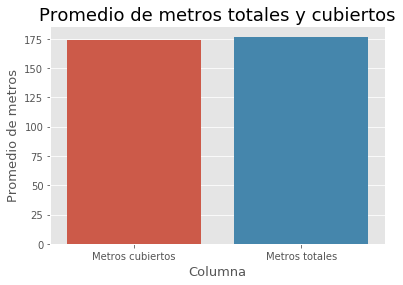

In [8]:
d = {'tipo': ['Metros cubiertos','Metros totales'], 'promedio': [data.metroscubiertos.mean(),data.metrostotales.mean()]}
mts = pd.DataFrame(data=d)
g = sns.barplot(x = "tipo", y = "promedio", data = mts)
g.set_title("Promedio de metros totales y cubiertos", fontsize=18)
g.set_xlabel("Columna", fontsize=13)
g.set_ylabel("Promedio de metros",fontsize=13 )

Text(0, 0.5, 'Precio promedio (en miles de pesos mexicanos)')

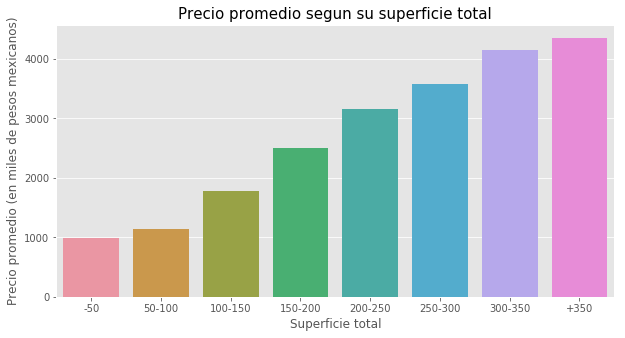

In [9]:
precio_sup = data.groupby('rango_superficie').agg({'precio':'mean'})
new_idx = ['-50','50-100','100-150','150-200','200-250','250-300','300-350','+350']
precio_sup = precio_sup.reindex(new_idx)
precio_sup.reset_index(inplace=True)
plt.figure(figsize = (10,5))
g = sns.barplot(x = precio_sup['rango_superficie'], y= precio_sup['precio']/1000) 
g.set_title("Precio promedio segun su superficie total", fontsize=15)
g.set_xlabel("Superficie total", fontsize=12)
g.set_ylabel("Precio promedio (en miles de pesos mexicanos)", fontsize=12)

In [10]:
rgsup_vs_rgprecio = data.groupby(['rango_superficie','rango_precio']).agg({'sum':'sum'})
new_idx_prec = ['-1000000','1000000-2000000','2000000-3000000','3000000','4000000-5000000','5000000-6000000','6000000-7000000','7000000-8000000','8000000-9000000','9000000-10000000','+10000000']
new_idx_sup = ['-50','50-100','100-150','150-200','200-250','250-300','300-350','+350']
rgsup_vs_rgprecio = rgsup_vs_rgprecio.reindex(new_idx_prec,level=1)
rgsup_vs_rgprecio = rgsup_vs_rgprecio.unstack()
rgsup_vs_rgprecio = rgsup_vs_rgprecio.reindex(new_idx_sup)
rgsup_vs_rgprecio = rgsup_vs_rgprecio.applymap(lambda x: np.log(x))
rgsup_vs_rgprecio.columns = rgsup_vs_rgprecio.columns.droplevel()

Text(69.0, 0.5, 'Rango de superficie')

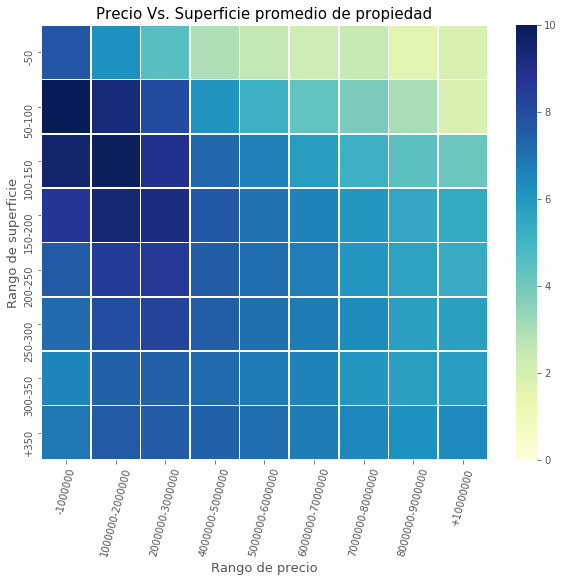

In [11]:
plt.figure(figsize=(10,8))
g = sns.heatmap(rgsup_vs_rgprecio, vmin = 0, vmax=10, cmap= "YlGnBu", linewidths=.5)
plt.xticks(rotation=75)
g.set_title("Precio Vs. Superficie promedio de propiedad", fontsize=15)
g.set_xlabel("Rango de precio", fontsize=13)
g.set_ylabel("Rango de superficie", fontsize=13)

In [12]:
ciudades = (data.ciudad.value_counts()>2500)
ciudades = (ciudades[ciudades==True]).index

data_ciudad = data.loc[data.ciudad.isin(ciudades)]
sup_vs_ciudad = data_ciudad.groupby(['rango_superficie','ciudad']).agg({'sum':'sum'}).unstack()

In [13]:
sup_vs_ciudad = sup_vs_ciudad.applymap(lambda x: np.log(x))

Text(69.0, 0.5, 'Rango de superficie')

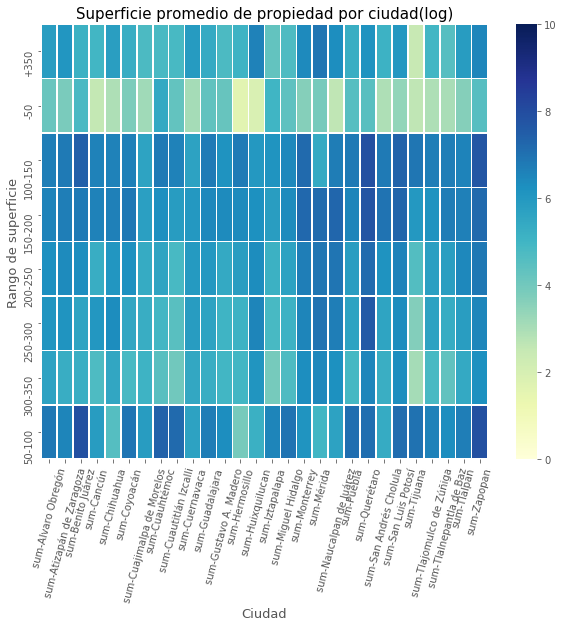

In [14]:
plt.figure(figsize=(10,8))
g = sns.heatmap(sup_vs_ciudad, vmin = 0, vmax=10, cmap= "YlGnBu", linewidths=.5)
plt.xticks(rotation=75)
g.set_title("Superficie promedio de propiedad por ciudad(log)", fontsize=15)
g.set_xlabel("Ciudad", fontsize=13)
g.set_ylabel("Rango de superficie", fontsize=13)
#FALTA ORDENAR EL INDICE VERTICAL

Text(0, 0.5, 'Cantidad de propiedades publicadas')

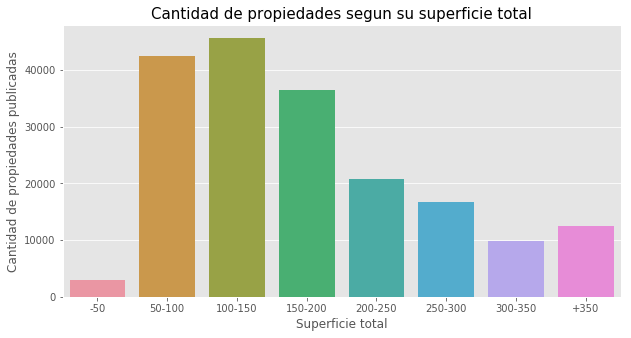

In [15]:
sup = data.groupby('rango_superficie').agg({'sum':'sum'})
new_idx = ['-50','50-100','100-150','150-200','200-250','250-300','300-350','+350']
sup = sup.reindex(new_idx)
sup.reset_index(inplace=True)
plt.figure(figsize = (10,5))
g = sns.barplot(x = sup['rango_superficie'], y= sup['sum']) 
g.set_title("Cantidad de propiedades segun su superficie total", fontsize=15)
g.set_xlabel("Superficie total", fontsize=12)
g.set_ylabel("Cantidad de propiedades publicadas", fontsize=12)

In [16]:
data_habitaciones = data.dropna(subset=['habitaciones','garages','banos'])
data_habitaciones = data_habitaciones[['rango_superficie','habitaciones','garages','banos']]
data_habitaciones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180644 entries, 0 to 239999
Data columns (total 4 columns):
rango_superficie    142810 non-null object
habitaciones        180644 non-null float32
garages             180644 non-null float32
banos               180644 non-null float64
dtypes: float32(2), float64(1), object(1)
memory usage: 5.5+ MB


In [17]:
data_habitaciones = data_habitaciones.groupby('rango_superficie').agg({'habitaciones':'mean','garages':'mean','banos':'mean'})
new_idx = ['-50','50-100','100-150','150-200','200-250','250-300','300-350','+350']
data_habitaciones = data_habitaciones.reindex(new_idx)
data_habitaciones

,habitaciones,garages,banos
rango_superficie,,,
-50,2.066761,0.859426,1.198872
50-100,2.430441,1.217991,1.449118
100-150,2.919479,1.654476,1.989900
150-200,3.095631,1.871129,2.352092
200-250,3.185427,2.008065,2.602777
250-300,3.216486,2.111585,2.810926
300-350,3.241151,2.152664,2.879813
+350,3.276743,2.121395,2.901059


Text(0, 0.5, 'Cantidad de habitaciones')

<Figure size 1440x576 with 0 Axes>

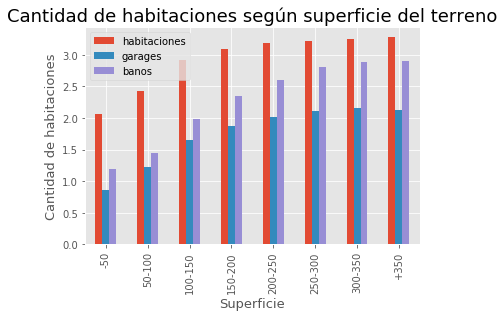

In [18]:
plt.figure(figsize=(20,8))

x = data_habitaciones.plot(kind='bar')
x.set_title("Cantidad de habitaciones según superficie del terreno", fontsize=18)
x.set_xlabel("Superficie", fontsize=13)
x.set_ylabel("Cantidad de habitaciones", fontsize=13)

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='superficie', y='precio', hue='todos_los_amenities', data=data_habitaciones)
plt.ylabel('Precio propiedad promedio')
plt.xlabel('Tipo de propiedad')
plt.title('Precio de propiedades con todos los tipos de amenity')

Text(0, 0.5, 'Promedio de habitaciones')

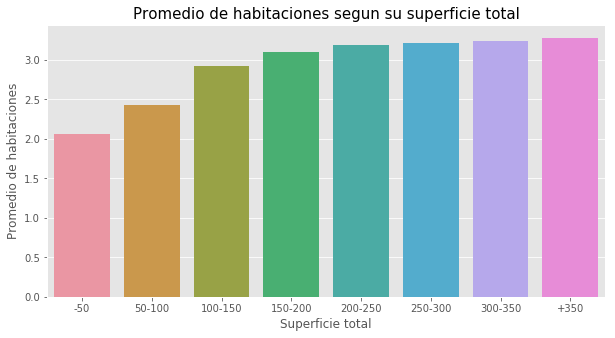

In [19]:
habit = data_habitaciones['habitaciones'].reset_index()
plt.figure(figsize = (10,5))
g = sns.barplot(x = habit['rango_superficie'], y= habit['habitaciones']) 
g.set_title("Promedio de habitaciones segun su superficie total", fontsize=15)
g.set_xlabel("Superficie total", fontsize=12)
g.set_ylabel("Promedio de habitaciones", fontsize=12)

Text(0, 0.5, 'Promedio de baños')

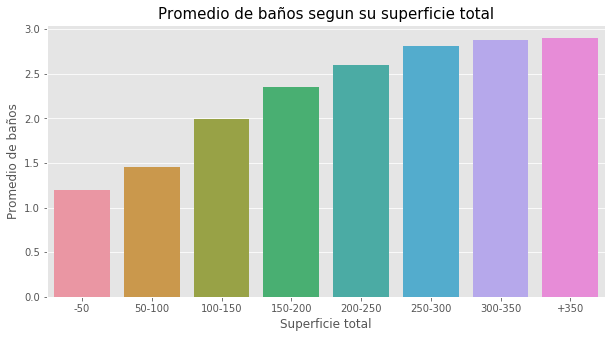

In [20]:
banos = data_habitaciones['banos'].reset_index()
plt.figure(figsize = (10,5))
g = sns.barplot(x = banos['rango_superficie'], y= banos['banos']) 
g.set_title("Promedio de baños segun su superficie total", fontsize=15)
g.set_xlabel("Superficie total", fontsize=12)
g.set_ylabel("Promedio de baños", fontsize=12)

Text(0, 0.5, 'Promedio de garages')

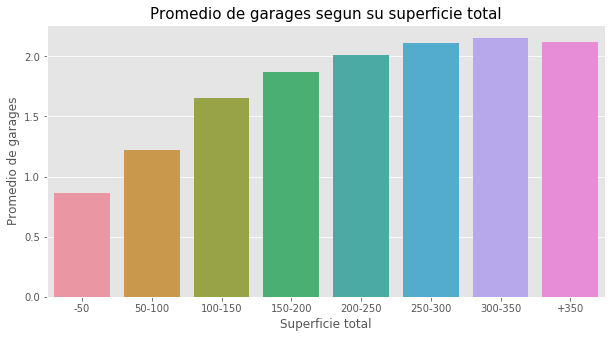

In [21]:
garages = data_habitaciones['garages'].reset_index()
plt.figure(figsize = (10,5))
g = sns.barplot(x = garages['rango_superficie'], y= garages['garages']) 
g.set_title("Promedio de garages segun su superficie total", fontsize=15)
g.set_xlabel("Superficie total", fontsize=12)
g.set_ylabel("Promedio de garages", fontsize=12)

Text(69.0, 0.5, 'Rango de superficie')

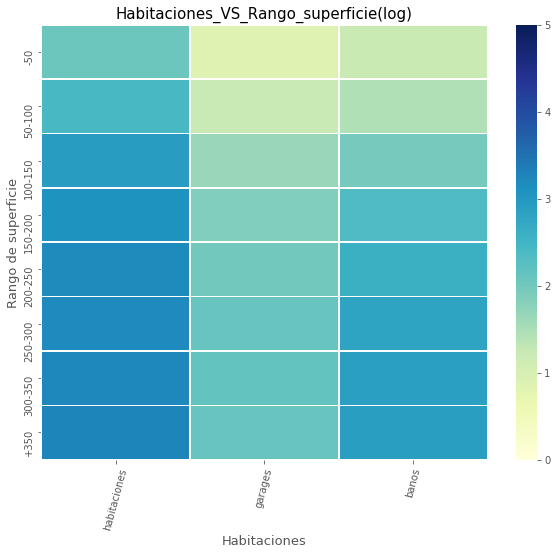

In [22]:
plt.figure(figsize=(10,8))
g = sns.heatmap(data_habitaciones, vmin = 0, vmax=5, cmap= "YlGnBu", linewidths=.5)
plt.xticks(rotation=75)
g.set_title("Habitaciones_VS_Rango_superficie(log)", fontsize=15)
g.set_xlabel("Habitaciones", fontsize=13)
g.set_ylabel("Rango de superficie", fontsize=13)

In [23]:
mex_df = data[data['provincia'].isin(['Distrito Federal'])]
mex_df.provincia.value_counts()

Distrito Federal    58790
Name: provincia, dtype: int64

Text(0, 0.5, 'Cantidad de propiedades publicadas')

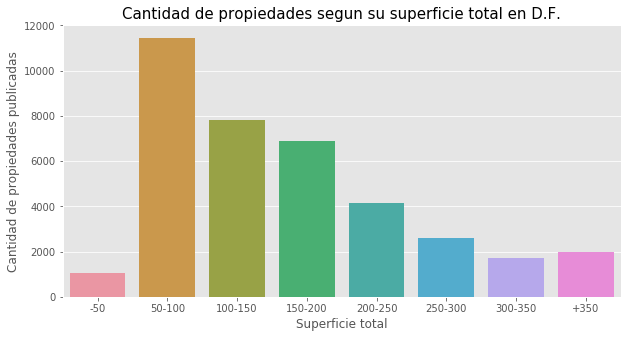

In [24]:
sup_df = mex_df.groupby('rango_superficie').agg({'sum':'sum'})
new_idx = ['-50','50-100','100-150','150-200','200-250','250-300','300-350','+350']
sup_df = sup_df.reindex(new_idx)
sup_df.reset_index(inplace=True)
plt.figure(figsize = (10,5))
g = sns.barplot(x = sup_df['rango_superficie'], y= sup_df['sum']) 
g.set_title("Cantidad de propiedades segun su superficie total en D.F.", fontsize=15)
g.set_xlabel("Superficie total", fontsize=12)
g.set_ylabel("Cantidad de propiedades publicadas", fontsize=12)


In [25]:
sup_vs_precio = mex_df.groupby(['rango_superficie','rango_precio']).agg({'sum':'sum'})
new_idx_df = ['-1000000','1000000-2000000','2000000-3000000','3000000','4000000-5000000','5000000-6000000','6000000-7000000','7000000-8000000','8000000-9000000','9000000-10000000','+10000000']
new_idx = ['-50','50-100','100-150','150-200','200-250','250-300','300-350','+350']
sup_vs_precio = sup_vs_precio.reindex(new_idx_df,level=1)
sup_vs_precio = sup_vs_precio.unstack()
sup_vs_precio = sup_vs_precio.reindex(new_idx)
sup_vs_precio = sup_vs_precio.applymap(lambda x: np.log(x))
sup_vs_precio.columns = sup_vs_precio.columns.droplevel()
sup_vs_precio

rango_precio,-1000000,1000000-2000000,2000000-3000000,4000000-5000000,5000000-6000000,6000000-7000000,7000000-8000000,8000000-9000000,+10000000
rango_superficie,,,,,,,,,
-50,6.542472,5.662960,3.806662,1.609438,1.609438,1.386294,1.791759,0.000000,0.000000
50-100,7.877018,8.434681,7.797291,5.971262,5.003946,4.234107,3.688879,2.944439,1.791759
100-150,5.509388,7.345365,7.595387,6.949856,6.459904,5.765191,5.117994,4.330733,4.007333
150-200,4.948760,6.782192,7.216709,6.927558,6.498282,6.165418,5.805135,5.347108,5.332719
200-250,4.174387,5.846439,6.576470,6.453625,6.135565,6.040255,5.497168,5.176150,5.105945
250-300,3.663562,5.105945,6.045005,5.880533,5.723585,5.560682,5.393628,4.927254,5.176150
300-350,3.135494,4.477337,5.093750,5.552960,5.332719,5.192957,5.030438,4.927254,5.220356
+350,3.295837,4.330733,5.105945,5.549076,5.411646,5.262690,5.231109,5.204007,5.703782


Text(69.0, 0.5, 'Rango de superficie')

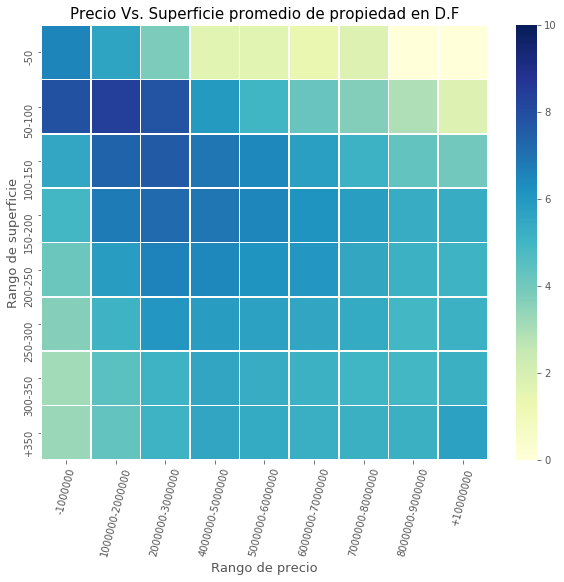

In [26]:
plt.figure(figsize=(10,8))
g = sns.heatmap(sup_vs_precio, vmin = 0, vmax=10, cmap= "YlGnBu", linewidths=.5)
plt.xticks(rotation=75)
g.set_title("Precio Vs. Superficie promedio de propiedad en D.F", fontsize=15)
g.set_xlabel("Rango de precio", fontsize=13)
g.set_ylabel("Rango de superficie", fontsize=13)

In [27]:
data_habitaciones = mex_df.groupby('rango_superficie').agg({'habitaciones':'mean','garages':'mean','banos':'mean'})
new_idx = ['-50','50-100','100-150','150-200','200-250','250-300','300-350','+350']
data_habitaciones = data_habitaciones.reindex(new_idx)
data_habitaciones

,habitaciones,garages,banos
rango_superficie,,,
-50,1.922747,0.612308,1.152577
50-100,2.296390,1.107751,1.491861
100-150,2.913364,1.621415,2.131348
150-200,3.283031,1.801707,2.409203
200-250,3.445411,1.838253,2.569650
250-300,3.495794,1.797332,2.719096
300-350,3.590389,1.629948,2.791367
+350,3.635246,1.526618,2.871016


Text(0, 0.5, 'Cantidad de habitaciones')

<Figure size 720x360 with 0 Axes>

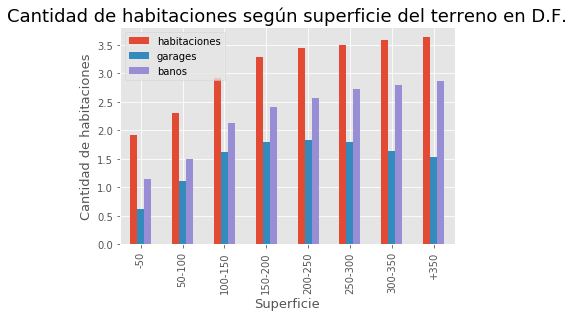

In [28]:
plt.figure(figsize = (10,5))
x = data_habitaciones.plot(kind='bar')
x.set_title("Cantidad de habitaciones según superficie del terreno en D.F.", fontsize=18)
x.set_xlabel("Superficie", fontsize=13)
x.set_ylabel("Cantidad de habitaciones", fontsize=13)

In [29]:
mex_df.

SyntaxError: invalid syntax (<ipython-input-29-381e4b9c1ef4>, line 1)